### Santander Coders 2023 | 2º semestre - DS (Turma #1114)

**Grupo:** Fabricio Porto, Mariana Cassundé, Suzielli Mendonça

**Projeto**  
Técnicas de Programação I (Python)  
Análise Exploratória de Dados de Dengue no Brasil (2000-2019)

**Objetivo:**  
Fazer uma Análise Exploratória de Dados utilizando um conjunto de dados sobre casos de dengue no Brasil entre os anos 2000 e 2019.



---



[Link para o conjunto de dados](https://www.kaggle.com/datasets/raomuhammadsaeedali/brazil-dengue-dataset-2000-2019/data?select=data_2000_2019.csv)

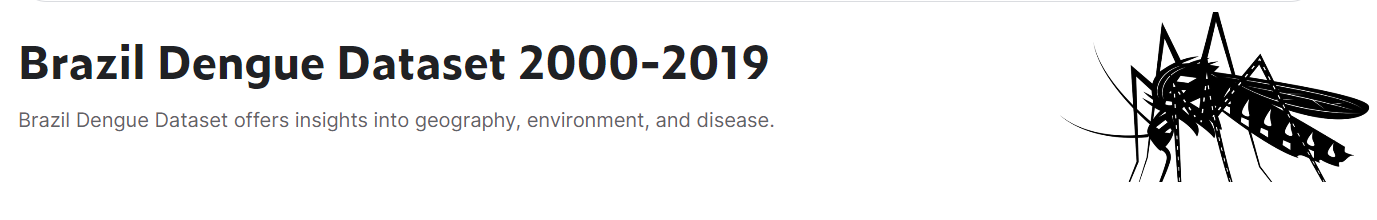

**Sobre o conjunto de dados:**    
A dengue é uma doença febril causada por vírus, caracterizada principalmente por febre alta de início rápido. Dengue é uma palavra espanhola que significa “manha” ou “melindre”, características que o doente costuma apresentar devido ao mal-estar provocado pelos sintomas. Os sintomas normalmente duram até sete dias.    

Segundo o portal de notícias [agênciaBrasil](https://agenciabrasil.ebc.com.br/saude/noticia/2023-12/brasil-e-pais-com-mais-casos-de-dengue-no-mundo-mostra-dados-da-oms), o Brasil lidera o número de casos de dengue no mundo, com **2,9 milhões** de casos registrados somente em 2023, sengundo a Organização Mundial de Saúde (OMS). E o ano de 2024 iniciou com um aumento significativo de casos registrados e de mortes pela doença.   

Por isso, é mais do que necessário termos dados e análises concretas de registros de casos, espalhamento da doença e dos seus fatores de incidência.    


**Algumas perguntas que gostaríamos de responder a partir desta análise**:    
- Como o número de casos registrados evoluiu ao longo do tempo dentro do período de 2000 a 2019?
- Qual região do país é a mais afetada pela doença?
- Quais fatores climáticos mais influenciam na incidência da doença?
- Existe uma relação entre o clima da região e do número de casos registrados?




---



**Bibliotecas Python permitidas no projeto:**    
- Numpy
- Pandas
- Matplotlib
- Seaborn  



---



# **0.0 Você conhece a dengue baseada em fatos reais? Podemos te contar!**


**Importação de bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
sns.set(style="whitegrid")

# **1.0 Coleta e tratamento dos dados**

In [ ]:
# Fazendo o upload do datasheet:
data = pd.read_csv('data_2000_2019_dengue.csv')
# Verificando as 5 primeiras e últimas linhas do conjunto de dados
display(data)

,micro_code,micro_name,micro_name_ibge,meso_code,meso_name,state_code,state_name,region_code,region_name,biome_code,...,time,dengue_cases,population,pop_density,tmax,tmin,pdsi,urban,water_network,water_shortage
0,11001,Porto Velho,PORTO VELHO,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1.0,NaN,NaN,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,11002,Guajar<e1>-Mirim,GUAJARÁ-MIRIM,1101,Madeira-Guaporé,11,Rondônia,1,North,5,...,1.0,NaN,NaN,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,11003,Ariquemes,ARIQUEMES,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1.0,NaN,NaN,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,11004,Ji-Paran<e1>,JI-PARANÁ,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1.0,NaN,NaN,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,11005,Alvorada D'Oeste,ALVORADA D'OESTE,1102,Leste Rondoniense,11,Rondônia,1,North,5,...,1.0,NaN,NaN,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79805,12004,Rio Branco,RIO BRANCO,1202,Vale Do Acre,12,Acre,1,North,5,...,144.0,712.0,425796.0,19.127648,31.119778,21.987160,-2.445740,83.36,48.71,0.5737
79806,12005,Brasil<e9>ia,BRASILÉIA,1202,Vale Do Acre,12,Acre,1,North,5,...,144.0,1.0,59793.0,3.764863,30.548254,21.042730,-2.995117,66.23,52.86,0.5020
79807,13001,Rio Negro AM,RIO NEGRO,1301,Norte Amazonense,13,Amazonas,1,North,5,...,144.0,23.0,98184.0,0.295473,31.793842,22.305288,-0.256501,49.29,38.32,0.3274
79808,13002,Japur<e1>,JAPURÁ,1301,Norte Amazonense,13,Amazonas,1,North,5,...,144.0,2.0,24951.0,0.343551,31.302008,21.937174,-0.624560,48.36,47.59,0.0000


In [ ]:
print(f"Temos {len(data.columns)} colunas nesse conjunto de dados. São elas:")
for column in data.columns:
    print(column)

Temos 26 colunas nesse conjunto de dados. São elas:
micro_code
micro_name
micro_name_ibge
meso_code
meso_name
state_code
state_name
region_code
region_name
biome_code
biome_name
ecozone_code
ecozone_name
main_climate
month
year
time
dengue_cases
population
pop_density
tmax
tmin
pdsi
urban
water_network
water_shortage


**Descrição do conteúdo das colunas:**    
- **micro_name_ibge**: Nome da microrregião, conforme definido pelo Instituto Brasileiro de Geografia e Estatística (IBGE).    
- **meso_name**: Nome da mesorregião, uma divisão geográfica que agrupa microrregiões com características sociais e econômicas semelhantes.    
- **state_name**: Nome do estado onde os dados foram coletados.    
- **region_name**: Nome da região geográfica do Brasil (Norte, Nordeste, Centro-Oeste, Sudeste, Sul) onde os dados foram coletados.    
-**biome_name**: Nome do bioma em que a coleta de dados ocorreu, como Amazônia, Cerrado, Caatinga, etc.    
- **ecozone_name**: Nome da zona ecológica, que pode se referir a uma classificação mais específica dentro de um bioma ou região.    
- **main_climate**: Classificação climática principal da região conforme categorizada.    
- **dengue_cases**: Número de casos de dengue registrados na região durante o período de coleta de dados.    
-**population**: População total na região durante o período de coleta de dados.    
- **pop_density**: Densidade populacional na região (habitantes por quilômetro quadrado).    
- **tmax**: Temperatura máxima registrada (possivelmente a média mensal ou anual) na região durante o período de coleta de dados.    
- **tmin**: Temperatura mínima registrada (possivelmente a média mensal ou anual) na região durante o período de coleta de dados.    
- **pdsi**: Índice de Severidade de Seca de Palmer (Palmer Drought Severity Index), que mede a secura ou umidade relativa do solo.    
- **urban**: Porcentagem ou classificação da área considerada urbana na região.    
- **water_network**: Indicador da presença ou qualidade da rede de abastecimento de água na região.    
- **water_shortage**: Indica se houve escassez de água na região durante o período de coleta de dados.

In [ ]:
# Excluindo colunas que não serão utilizadas nas análises posteriores
data_limpo = data.drop(["micro_code","micro_name", "meso_code", "region_code", "biome_code", "ecozone_code","time", "population","pop_density"],axis=1)
# Verificando as 5 primeiras e últimas linhas do novo conjunto de dados
display(data_limpo)

,micro_name_ibge,meso_name,state_code,state_name,region_name,biome_name,ecozone_name,main_climate,month,year,dengue_cases,tmax,tmin,pdsi,urban,water_network,water_shortage
0,PORTO VELHO,Madeira-Guaporé,11,Rondônia,North,Amazon,Amazon,AM,1,2000.0,NaN,30.544556,21.751202,-1.790602,85.20,33.57,0.2245
1,GUAJARÁ-MIRIM,Madeira-Guaporé,11,Rondônia,North,Amazon,Amazon,AM,1,2000.0,NaN,31.005884,21.641306,0.629408,72.31,27.43,0.0873
2,ARIQUEMES,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000.0,NaN,30.444357,21.492065,-3.455422,66.91,27.76,0.1871
3,JI-PARANÁ,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000.0,NaN,30.458706,21.111828,-1.586286,68.68,32.23,0.2381
4,ALVORADA D'OESTE,Leste Rondoniense,11,Rondônia,North,Amazon,Amazon,AM,1,2000.0,NaN,30.616793,21.053421,-0.043228,42.82,21.40,0.2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79805,RIO BRANCO,Vale Do Acre,12,Acre,North,Amazon,Amazon,AM,12,2011.0,712.0,31.119778,21.987160,-2.445740,83.36,48.71,0.5737
79806,BRASILÉIA,Vale Do Acre,12,Acre,North,Amazon,Amazon,AF,12,2011.0,1.0,30.548254,21.042730,-2.995117,66.23,52.86,0.5020
79807,RIO NEGRO,Norte Amazonense,13,Amazonas,North,Amazon,Amazon,AF,12,2011.0,23.0,31.793842,22.305288,-0.256501,49.29,38.32,0.3274
79808,JAPURÁ,Norte Amazonense,13,Amazonas,North,Amazon,Amazon,AF,12,2011.0,2.0,31.302008,21.937174,-0.624560,48.36,47.59,0.0000


In [ ]:
# Verificando o tamanho do conjunto de dados
data_limpo.shape

(79810, 17)

In [ ]:
# Verificando se existem duplicatas
duplicates = data_limpo.duplicated()
duplicates.sum()

0

In [ ]:
# Verificando se existem valores nulos e quais são os tipos de dados de cada coluna do conjunto
data_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79810 entries, 0 to 79809
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   micro_name_ibge  79810 non-null  object 
 1   meso_name        79810 non-null  object 
 2   state_code       79810 non-null  int64  
 3   state_name       79810 non-null  object 
 4   region_name      79810 non-null  object 
 5   biome_name       79810 non-null  object 
 6   ecozone_name     79810 non-null  object 
 7   main_climate     79810 non-null  object 
 8   month            79810 non-null  int64  
 9   year             79809 non-null  float64
 10  dengue_cases     73113 non-null  float64
 11  tmax             79809 non-null  float64
 12  tmin             79809 non-null  float64
 13  pdsi             79666 non-null  float64
 14  urban            79809 non-null  float64
 15  water_network    79809 non-null  float64
 16  water_shortage   79809 non-null  float64
dtypes: float64(8

- Nosso conjunto de dados possui 133920 linhas, entretanto:
  - 9   dengue_cases     **127224 non-null**  float64
  - 12  pdsi             **133680 non-null**  float64
- Vamos analisar mais a fundo quais são os valores faltantes

In [ ]:
# Verificando valores faltantes
missing_values = data_limpo.isnull().sum()
missing_values

micro_name_ibge       0
meso_name             0
state_code            0
state_name            0
region_name           0
biome_name            0
ecozone_name          0
main_climate          0
month                 0
year                  1
dengue_cases       6697
tmax                  1
tmin                  1
pdsi                144
urban                 1
water_network         1
water_shortage        1
dtype: int64

De fato, temos valores nulos nas colunas 'dengue_cases' e 'pdsi'.
- Para *'dengue_cases'*: consideramos casos de dengue ausentes como 0, assumindo que a ausência de registro pode significar 0 casos reportados
- Para *'pdsi'*: imputamos os valores ausentes com a média da coluna

In [ ]:
# Tratamento da coluna 'dengue_cases'
data_limpo['dengue_cases'] = data_limpo['dengue_cases'].fillna(0)

# Cálculo da média da coluna 'pdsi'
pdsi_mean = data_limpo['pdsi'].mean()
# Tratamento da coluna 'pdsi'
data_limpo['pdsi'] = data_limpo['pdsi'].fillna(pdsi_mean)

# Verificando novamente a presença de valores faltantes após o tramento
missing_values_tratamento = data_limpo.isnull().sum()
missing_values_tratamento

micro_name_ibge    0
meso_name          0
state_code         0
state_name         0
region_name        0
biome_name         0
ecozone_name       0
main_climate       0
month              0
year               1
dengue_cases       0
tmax               1
tmin               1
pdsi               0
urban              1
water_network      1
water_shortage     1
dtype: int64

In [ ]:
# Verificando os dados estatísticos do conjunto de dados (registros, média, valor mínimo e máximo, etc)
data_limpo.describe()

,state_code,month,year,dengue_cases,tmax,tmin,pdsi,urban,water_network,water_shortage
count,79810.000000,79810.000000,79809.000000,79810.000000,79809.000000,79809.000000,79810.000000,79809.000000,79809.000000,79809.000000
mean,31.298935,6.462649,2005.462579,62.614635,29.282094,18.829650,-0.087388,72.096794,72.280993,0.357279
std,10.387959,3.433790,3.433756,665.045329,3.486083,3.670493,1.706314,16.629970,17.026404,0.240635
min,11.000000,1.000000,2000.000000,0.000000,14.425291,4.615391,-5.805633,22.300000,16.680000,0.000000
25%,24.000000,3.000000,2002.000000,0.000000,27.417265,16.762091,-1.268025,58.390000,62.680000,0.160100
50%,31.000000,6.000000,2005.000000,2.000000,30.033127,19.755949,-0.212491,72.700000,74.850000,0.324300
75%,41.000000,9.000000,2008.000000,17.000000,31.661070,21.651545,0.936597,86.680000,85.700000,0.531700
max,53.000000,12.000000,2011.000000,76331.000000,37.885544,25.350147,6.849275,100.000000,98.810000,1.000000


# **2.0 Análise Exploratória dos Dados Tratados**

### **2.1 Como o número de casos registrados evoluiu ao longo do tempo dentro do período de 2000 a 2019?** ###

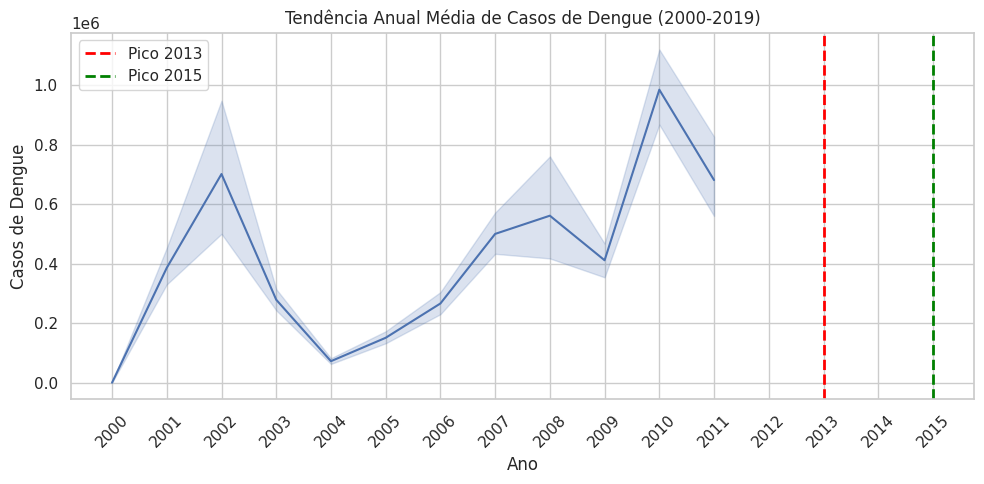

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=data_limpo, x='year', y='dengue_cases', estimator='sum')

# Adiciona linhas verticais para os anos de 2013 e 2015
plt.axvline(x=2013, color='red', linestyle='--', lw=2, label='Pico 2013')
plt.axvline(x=2015, color='green', linestyle='--', lw=2, label='Pico 2015')

# Ajustar os ticks do eixo x para mostrar todos os anos no gráfico
plt.xticks(rotation=45) # Rotaciona os labels para melhor visualização se necessário
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1)) # Define um tick para cada ano

plt.title('Tendência Anual Média de Casos de Dengue (2000-2019)')
plt.xlabel('Ano')
plt.ylabel('Casos de Dengue')
plt.legend() #
plt.tight_layout()
plt.show()

In [ ]:
# Verificando qual o ano com o maior número de casos registrados
data_ano = data_limpo.loc[:,["year", "dengue_cases"]]
data_ano = data_ano.groupby("year").sum()

maior_num_infectados = data_ano['dengue_cases'].max()

ano_correspondente = data_ano[data_ano['dengue_cases'] == maior_num_infectados].index[0]

print(f"O ano com o maior número de casos de dengue é {ano_correspondente} com {maior_num_infectados} casos.")

O ano com o maior número de casos de dengue é 2010.0 com 985469.0 casos.


In [ ]:
# Coluna 'year_month' para combinar 'year' e 'month'
data_limpo['year_month'] = data_limpo['year'].astype(str) + '-' + data_limpo['month'].astype(str).str.zfill(2)

# Agrupamento por 'year_month' e somar os casos de dengue, especificando numeric_only=True
data_ano_mes = data_limpo.groupby('year_month').sum(numeric_only=True)

# Encontra o maior número de casos de dengue
maior_num_infectados = data_ano_mes['dengue_cases'].max()

# Encontrar a data correspondente ao maior número de infectados
data_correspondente = data_ano_mes[data_ano_mes['dengue_cases'] == maior_num_infectados].index[0]

print(f"A data com o maior número de casos de dengue é {data_correspondente} com {maior_num_infectados} casos.")

A data com o maior número de casos de dengue é 2002.0-03 com 219862.0 casos.


### **2.2 Qual região do país é a mais afetada pela doença?** ###

In [ ]:
# Agrupa o dataset por 'region_name' e soma os casos de dengue
casos_por_regiao = data_limpo.groupby('region_name')['dengue_cases'].sum().reset_index()

# Ordena os resultados em ordem decrescente de casos de dengue
casos_por_regiao = casos_por_regiao.sort_values('dengue_cases', ascending=False)

# Mostra a região com mais casos
regiao_mais_casos = casos_por_regiao.iloc[0]

print(f"A região com mais casos de dengue é {regiao_mais_casos['region_name']}, com {regiao_mais_casos['dengue_cases']} casos.")
casos_por_regiao

A região com mais casos de dengue é Southeast, com 2157318.0 casos.


,region_name,dengue_cases
4,Southeast,2157318.0
2,Northeast,1513067.0
0,Centre-West,682558.0
1,North,518490.0
3,South,125841.0


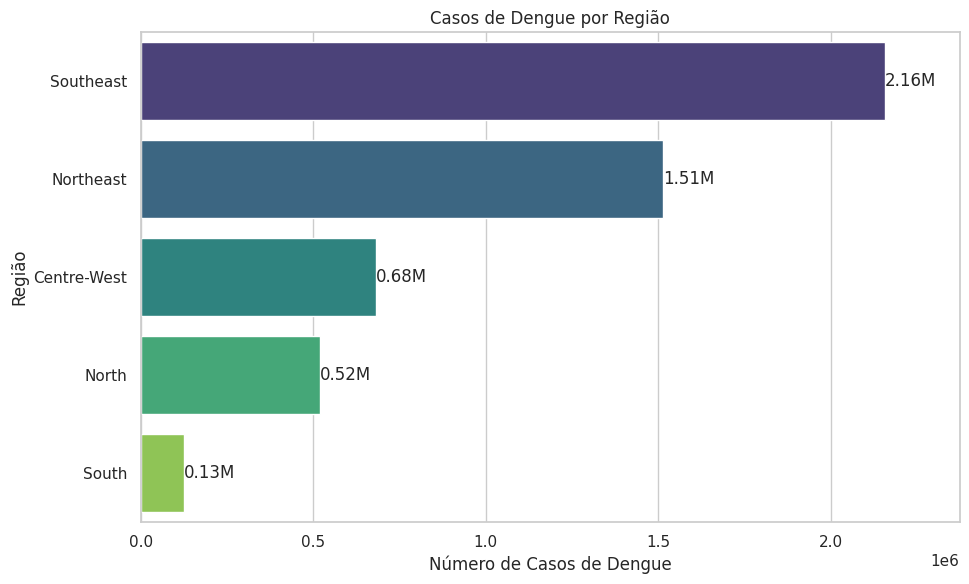

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x='dengue_cases', y='region_name', hue='region_name', data=casos_por_regiao, palette='viridis', legend=False)

for index, value in enumerate(casos_por_regiao['dengue_cases']):
    plt.text(value, index, f'{value/1_000_000:.2f}M', va='center')

plt.title('Casos de Dengue por Região')
plt.xlabel('Número de Casos de Dengue')
plt.ylabel('Região')
plt.tight_layout()

max_cases = casos_por_regiao['dengue_cases'].max()
plt.xlim(0, max_cases * 1.1)  # ajustando o eixo x para caber a informação de 6.7M

plt.show()

### **2.3 Quais fatores climáticos mais influenciam na incidência da doença?** ###

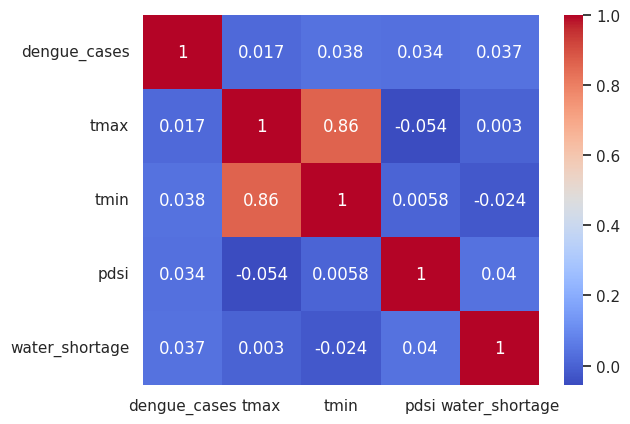

In [ ]:
data_climatica = data_limpo[['dengue_cases', 'tmax', 'tmin', 'pdsi', 'water_shortage']]

# Mapa de calor da matriz de correlação
sns.heatmap(data_climatica.corr(), annot=True, cmap='coolwarm')
plt.show()


### **2.4 Existe uma relação entre o clima da região e do número de casos registrados?** ###

In [ ]:
# Calcula a média das temperaturas e adicionar como nova coluna 'temp_media'
data_limpo['temp_media'] = (data_limpo['tmax'] + data_limpo['tmin']) / 2

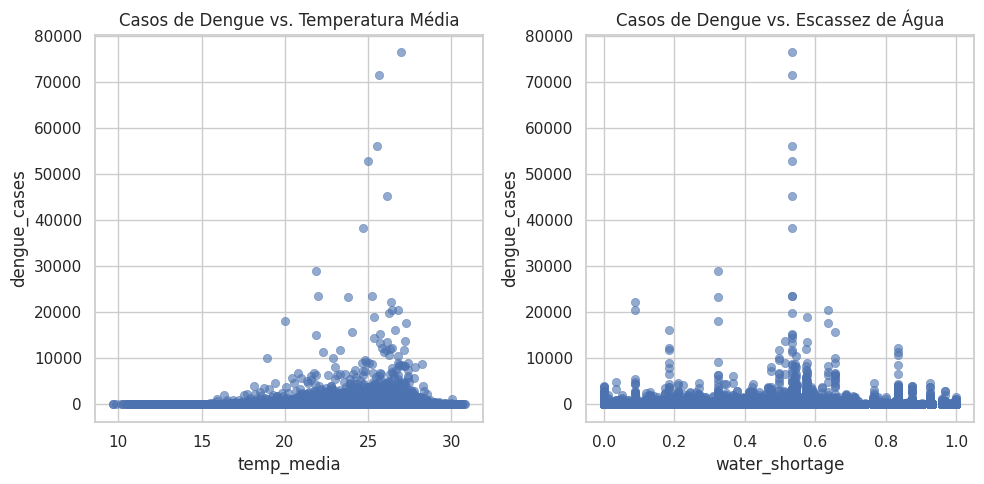

In [ ]:
# Gráfico de dispersão entre casos de dengue e média de temperatura
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1) # 1 linha, 2 colunas, posição 1
sns.scatterplot(x='temp_media', y='dengue_cases', data=data_limpo, alpha=0.6, edgecolor=None)
plt.title('Casos de Dengue vs. Temperatura Média')

# Gráfico de dispersão entre casos de dengue e escassez de água
plt.subplot(1, 2, 2) # 1 linha, 2 colunas, posição 2
sns.scatterplot(x='water_shortage', y='dengue_cases', data=data_limpo, alpha=0.6, edgecolor=None)
plt.title('Casos de Dengue vs. Escassez de Água')

plt.tight_layout()
plt.show()


 - **Casos de Dengue vs. Temperatura média**
  - Observa-se uma concentração de pontos na faixa de temperatura média entre aproximadamente 20 a 30 graus Celsius, com uma distribuição relativamente uniforme de casos de dengue. Isso sugere que a temperatura média dentro dessa faixa está presente em locais com variados números de casos de dengue;
  - Não é possível inferir uma relação direta ou tendência clara somente com este gráfico.


- **Casos de Dengue vs. Escassez de Água**
  - A escassez de água é representada como um valor entre 0 e 1, onde valores mais altos indicam maior escassez;
  - A distribuição dos pontos mostra que os surtos de dengue (pontos mais altos no eixo y) ocorrem em uma variedade de níveis de escassez de água, sem uma relação clara que indique que a escassez de água leva a mais casos de dengue;
  - não há evidência suficiente para concluir se há ou não uma tendência, já que a escassez de água não parece ser um preditor consistente para a quantidade de casos de dengue.

# **3.0 Conclusão**

Ao longo deste projeto, exploramos a distribuição e os fatores associados aos casos de dengue no Brasil,no período de 2000 a 2019, utilizando um conjunto de dados que inclui informações sobre os casos de dengue e variáveis climáticas por estado. Através de análises gráficas e estatísticas, identificamos padrões e correlações que oferecem insights sobre como o clima pode influenciar a transmissão da dengue no país.

A análise gráfica revelou variações na incidência da dengue ao longo do tempo e entre diferentes regiões geográficas. Gráficos de dispersão entre casos de dengue e variáveis climáticas como temperatura média e escassez de água forneceram uma visão inicial da complexa interação entre o clima e a transmissão da dengue. Embora algumas relações não tenham mostrado padrões claros, observamos que certas condições climáticas podem estar associadas a um aumento no número de casos de dengue.

Concluímos que, embora existam correlações entre os casos de dengue e fatores climáticos, a transmissão da doença é influenciada por uma combinação complexa de fatores, incluindo variáveis ambientais, sociais e de saúde pública. Portanto, estratégias eficazes de prevenção e controle da dengue no Brasil devem considerar essa multifatorialidade, adaptando-se às condições locais específicas de cada região.

Este projeto ressalta a importância de continuar explorando dados e aplicando métodos analíticos para entender melhor a epidemiologia da dengue. Através de uma abordagem integrada que combina análise de dados, vigilância epidemiológica e intervenções baseadas em evidências, podemos avançar em direção ao controle efetivo da dengue no Brasil.

A boa notícia é que, segundo o portal de informações [gov.br](https://www.gov.br/saude/pt-br/assuntos/noticias/2024/fevereiro/ministerio-da-saude-inicia-distribuicao-de-vacinas-contra-dengue), no final de 2023, o Ministério da Saúde incorporou a vacina contra a dengue ao Sistema Único de Saúde (SUS) e já iniciou a sua distribuição no país.



---



**Final do projeto**